Note that I do first the stuff with the data and after that I do the model 

In [11]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D


In [12]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [13]:
train_images.shape



(60000, 28, 28)

In [14]:
print(train_labels[0])

5


In [15]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    return (train_images/255., test_images/255.)
    
    


In [18]:
import torch
from torchvision import datasets, transforms

# Transformations applied to each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading MNIST dataset with specified transformations and obtaining both the images and labels
train_dataset = datasets.MNIST('./data/mnist', train=True, download=True, transform=transform)
train_images, train_labels = train_dataset.data, train_dataset.targets

print("Shape of Training Images: ", train_images.shape)
print("Shape of Training Labels: ", len(train_labels))

Shape of Training Images:  torch.Size([60000, 28, 28])
Shape of Training Labels:  60000


In [19]:
for label in set(train_labels.numpy()):
    print("Number of images with label {}: {}".format(label, (train_labels == label).sum()))
    

Number of images with label 0: 5923
Number of images with label 1: 6742
Number of images with label 2: 5958
Number of images with label 3: 6131
Number of images with label 4: 5842
Number of images with label 5: 5421
Number of images with label 6: 5918
Number of images with label 7: 6265
Number of images with label 8: 5851
Number of images with label 9: 5949


In [20]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


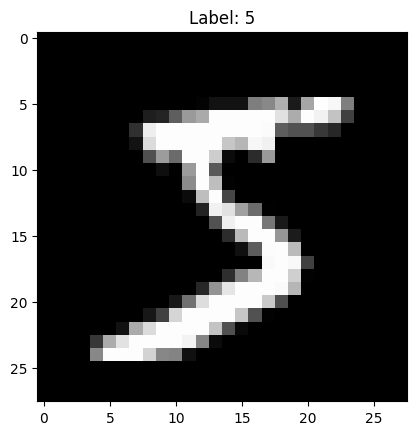

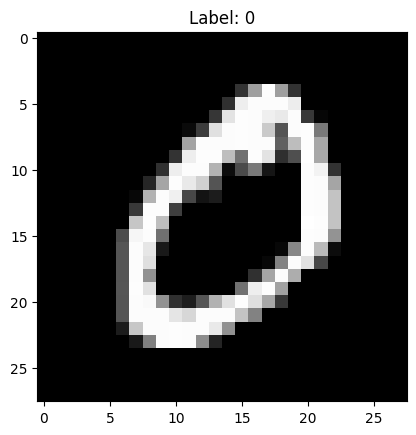

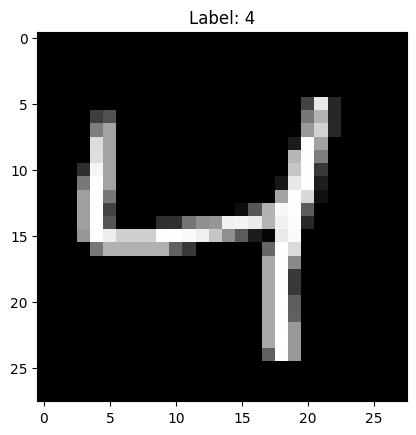

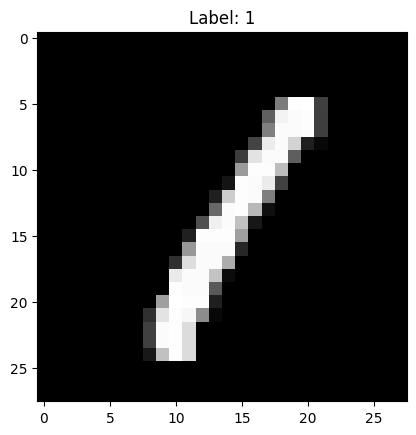

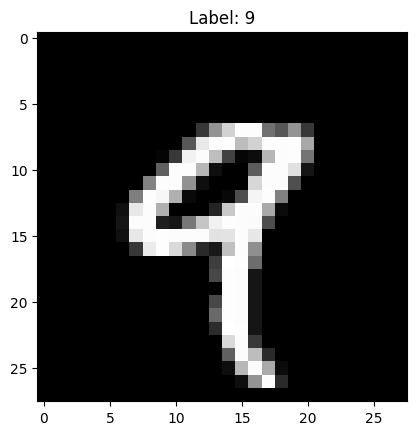

In [25]:
# Display the first 5 images from the training set and their labels
#i = 0
#img = train_images[i].numpy().reshape(28,28)
#plt.imshow(img, cmap='gray')
#plt.title(f'Label: {train_labels[i]}')
#plt.show(block=True)

#fix this code, they have to show 5 images
for i in range(5):
    img = train_images[i].numpy().reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.show(block=True)


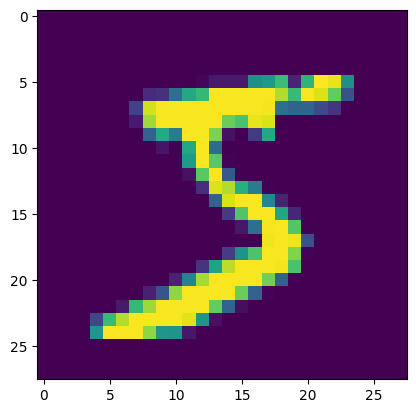

label: 5


In [27]:
# Display one of the images
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {class_names[train_labels[i]]}")

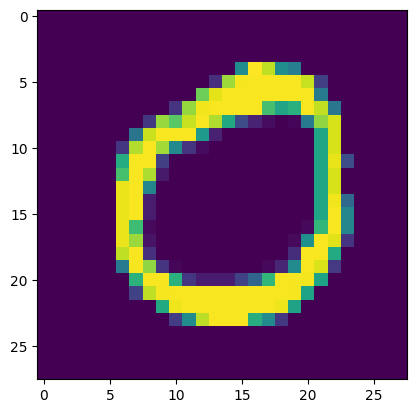

Label: 0


In [11]:
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {class_names[test_labels[random_inx]]}")

In [55]:

#model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])



/home/juan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [56]:
  
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
    

In [57]:
#train the model
model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256)


Epoch 1/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7260 - loss: 3.8403
Epoch 2/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9413 - loss: 0.2240
Epoch 3/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9648 - loss: 0.1248
Epoch 4/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9728 - loss: 0.0942
Epoch 5/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9794 - loss: 0.0653
Epoch 6/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9833 - loss: 0.0545
Epoch 7/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9861 - loss: 0.0435
Epoch 8/8
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9881 - loss: 0.0377


In [65]:
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")


313/313 - 0s - 1ms/step - accuracy: 0.9772 - loss: 0.0845
Test accuracy: 0.9771999716758728


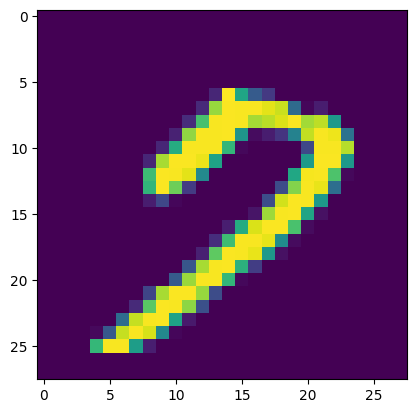

Label: 7


In [67]:
#Make predicions from the model
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {class_names[test_labels[random_inx]]}")

In [68]:
#get the model predictions
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {class_names[np.argmax(predictions)]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model prediction: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

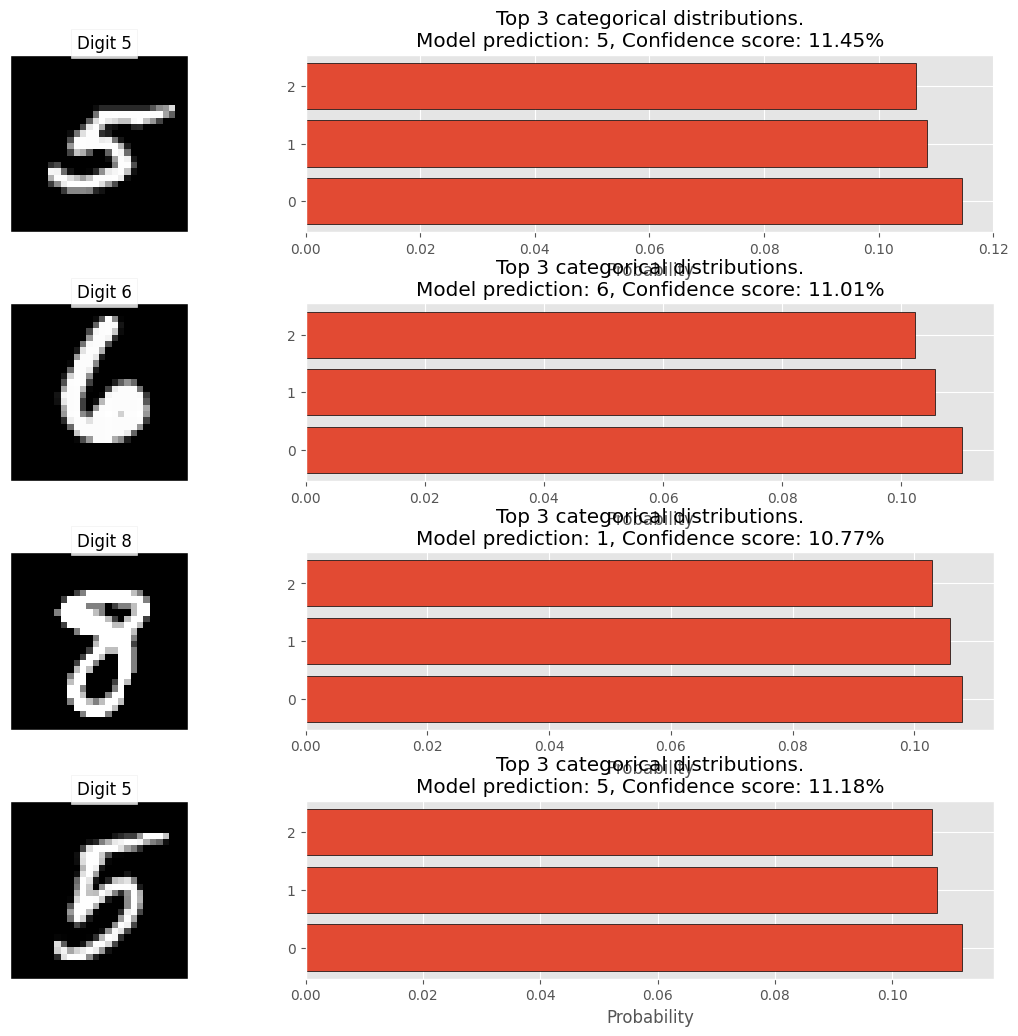

In [99]:
import matplotlib.pyplot as plt
import numpy as np

scaled_test_images = test_images / 255.


num_classes = len(class_names)

# Run this cell to get model predictions on randomly selected test images
num_test_images = scaled_test_images.shape[0]
random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]
predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image), cmap='gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=12)

    # Normalizing predictions for correct scaling
    normalized_prediction = prediction / np.sum(prediction)

    # Sorted indices
    sorted_indices = np.argsort(normalized_prediction)[::-1]

    # Plotting top 3 classes only
    axes[i, 1].barh(np.arange(min(len(normalized_prediction), 3)), normalized_prediction[sorted_indices[:3]], edgecolor='k', align='center')
    axes[i, 1].set_xlabel('Probability')
    axes[i, 1].set_title(f"Top 3 categorical distributions.\nModel prediction: {np.argmax(prediction)}, Confidence score: {round(np.max(normalized_prediction)*100, 2)}%")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

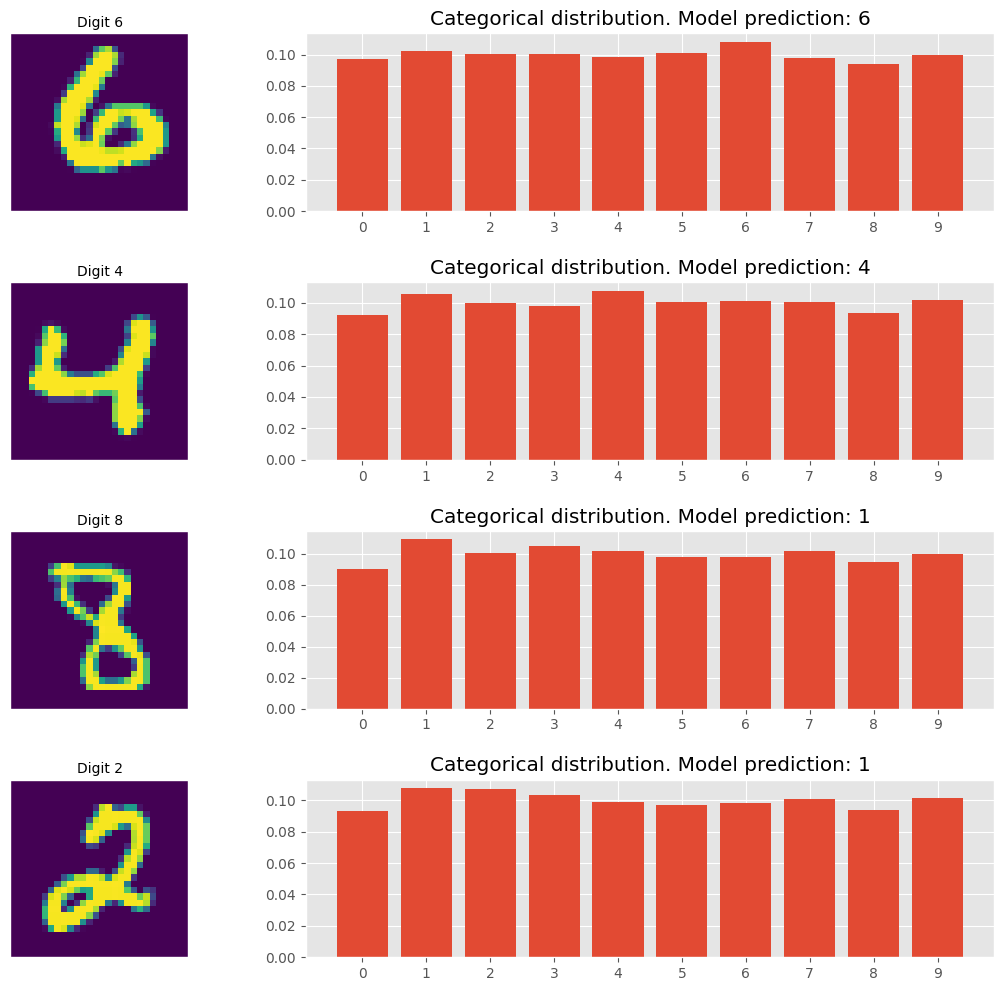

In [101]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()